In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
%matplotlib inline


In [35]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  RandomizedSearchCV, train_test_split
from xgboost import XGBClassifier
# from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [4]:
df_data_1 = pd.read_csv('patientdataV6.csv')

In [5]:
df_data_1.info()
df_data_1.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AVGHEARTBEATSPERMIN  10800 non-null  int64 
 1   PALPITATIONSPERDAY   10800 non-null  int64 
 2   CHOLESTEROL          10800 non-null  int64 
 3   BMI                  10800 non-null  int64 
 4   HEARTFAILURE         10800 non-null  object
 5   AGE                  10800 non-null  int64 
 6   SEX                  10800 non-null  object
 7   FAMILYHISTORY        10800 non-null  object
 8   SMOKERLAST5YRS       10800 non-null  object
 9   EXERCISEMINPERWEEK   10800 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 843.9+ KB


AVGHEARTBEATSPERMIN    False
PALPITATIONSPERDAY     False
CHOLESTEROL            False
BMI                    False
HEARTFAILURE           False
AGE                    False
SEX                    False
FAMILYHISTORY          False
SMOKERLAST5YRS         False
EXERCISEMINPERWEEK     False
dtype: bool

In [7]:
df_data_1.isnull().sum()

AVGHEARTBEATSPERMIN    0
PALPITATIONSPERDAY     0
CHOLESTEROL            0
BMI                    0
HEARTFAILURE           0
AGE                    0
SEX                    0
FAMILYHISTORY          0
SMOKERLAST5YRS         0
EXERCISEMINPERWEEK     0
dtype: int64

In [8]:
df_data_1.describe()

,AVGHEARTBEATSPERMIN,PALPITATIONSPERDAY,CHOLESTEROL,BMI,AGE,EXERCISEMINPERWEEK
count,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000
mean,87.115093,20.423148,195.080278,26.359722,49.965185,119.729537
std,19.744375,12.165320,26.136732,3.820147,13.079281,71.147060
min,48.000000,0.000000,150.000000,20.000000,28.000000,0.000000
25%,72.000000,10.000000,173.000000,23.000000,39.000000,58.000000
50%,85.000000,20.000000,196.000000,26.000000,50.000000,119.000000
75%,100.000000,31.000000,217.000000,30.000000,61.000000,180.000000
max,161.000000,45.000000,245.000000,34.000000,72.000000,250.000000


In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_data_1['HEARTFAILURE']=le.fit_transform(df_data_1['HEARTFAILURE'])
df_data_1['SEX']=le.fit_transform(df_data_1['SEX'])
df_data_1['FAMILYHISTORY']=le.fit_transform(df_data_1['FAMILYHISTORY'])



In [10]:
df_data_1.head()

,AVGHEARTBEATSPERMIN,PALPITATIONSPERDAY,CHOLESTEROL,BMI,HEARTFAILURE,AGE,SEX,FAMILYHISTORY,SMOKERLAST5YRS,EXERCISEMINPERWEEK
0,93,22,163,25,0,49,0,0,N,110
1,108,22,181,24,0,32,0,0,N,192
2,86,0,239,20,0,60,0,0,N,121
3,80,36,164,31,1,45,0,1,N,141
4,66,36,185,23,0,39,0,0,N,63


In [11]:
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AVGHEARTBEATSPERMIN  10800 non-null  int64 
 1   PALPITATIONSPERDAY   10800 non-null  int64 
 2   CHOLESTEROL          10800 non-null  int64 
 3   BMI                  10800 non-null  int64 
 4   HEARTFAILURE         10800 non-null  int64 
 5   AGE                  10800 non-null  int64 
 6   SEX                  10800 non-null  int64 
 7   FAMILYHISTORY        10800 non-null  int64 
 8   SMOKERLAST5YRS       10800 non-null  object
 9   EXERCISEMINPERWEEK   10800 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 843.9+ KB


In [15]:
df_data_1['SMOKERLAST5YRS']=le.fit_transform(df_data_1['SMOKERLAST5YRS'])

In [16]:
df_data_1.shape

(10800, 10)

In [18]:
df_data_1.to_csv('patientdataV61.csv')

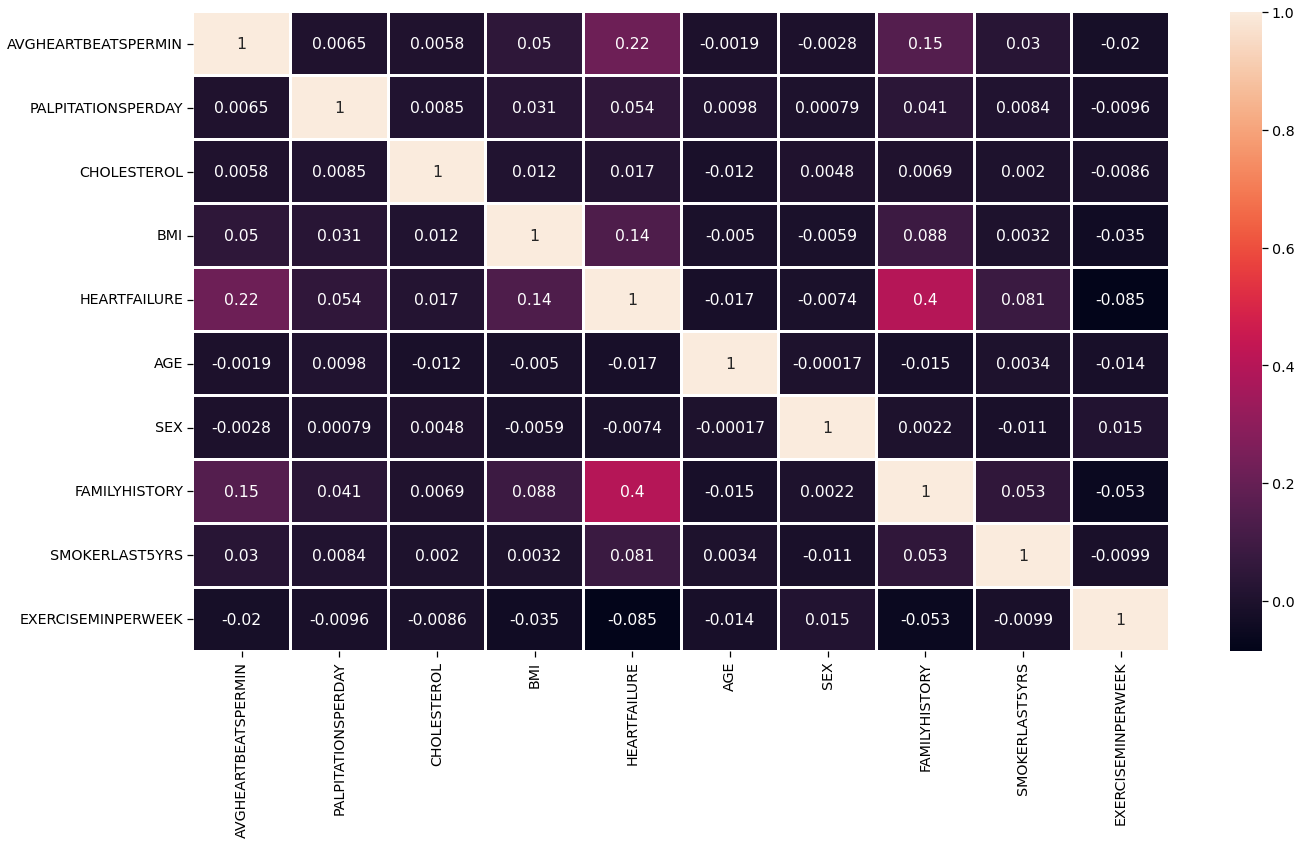

In [22]:
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(df_data_1.corr(),annot=True,linewidth =2)
plt.tight_layout()

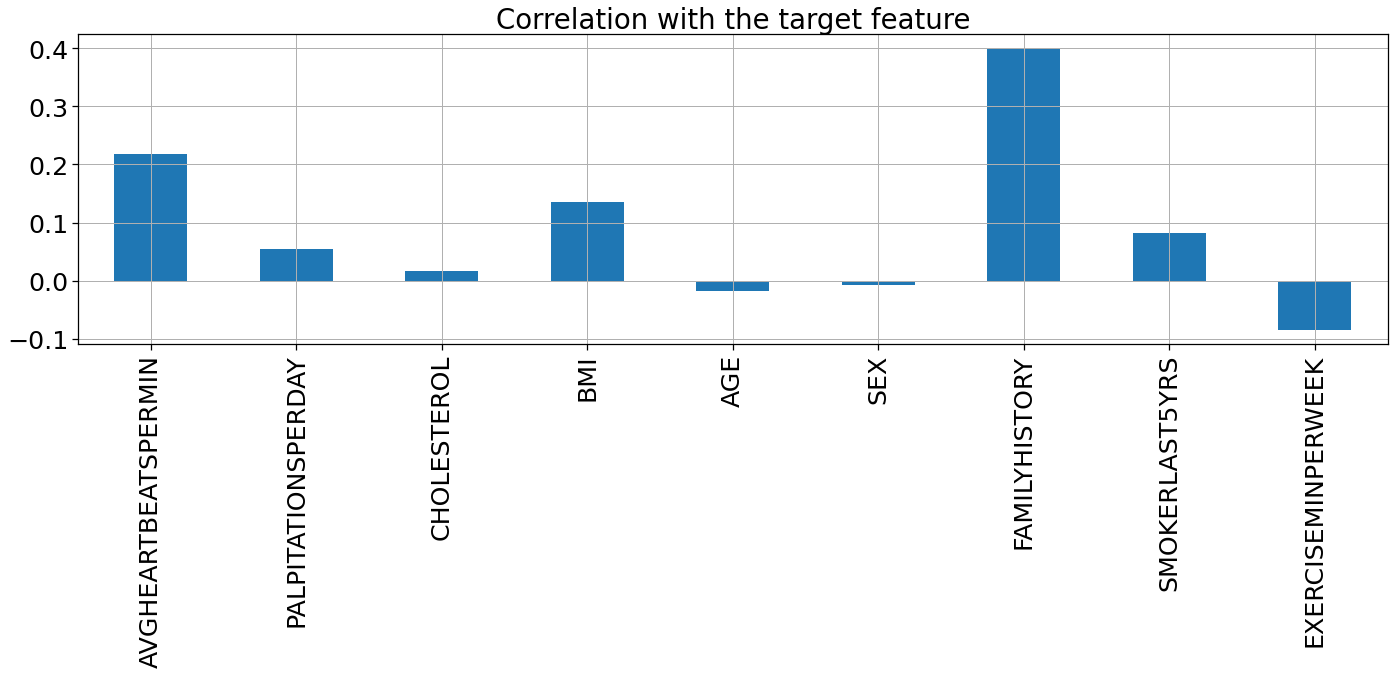

In [25]:
sns.set_context('notebook',font_scale = 2.3)
df_data_1.drop('HEARTFAILURE', axis=1).corrwith(df_data_1.HEARTFAILURE).plot(kind='bar', grid=True, figsize=(20, 10), title="Correlation with the target feature")
plt.tight_layout()

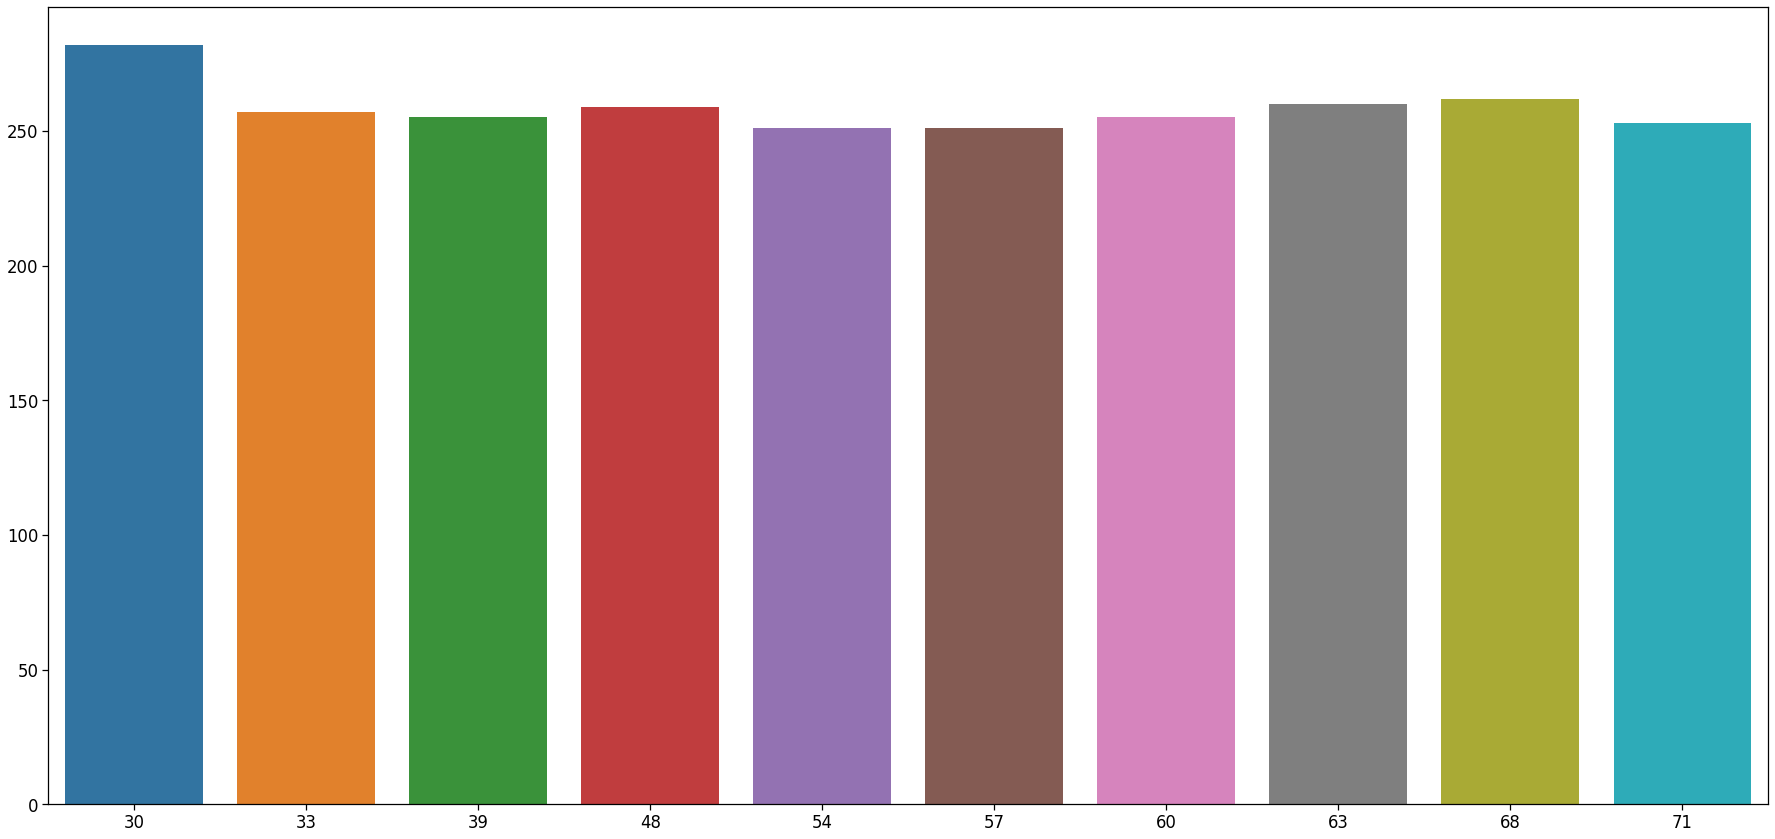

In [29]:
plt.figure(figsize=(25,12))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=df_data_1.AGE.value_counts()[:10].index,y=df_data_1.AGE.value_counts()[:10].values)
plt.tight_layout()

In [30]:
categorical_val = []
continous_val = []
for column in df_data_1.columns:
    print("--------------------")
    print(f"{column} : {df_data_1[column].unique()}")
    if len(df_data_1[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

--------------------
AVGHEARTBEATSPERMIN : [ 93 108  86  80  66 125  83 107  92  84  60 134 103 101  82  63  89  69
  96  50  79 116 104  81  85  56  87  62  78 115  68 111 100 124  75  77
  90  76  91  73 114  72  71  95  94 112 122  88  64  55  97 118 110 140
  61 130 102  67  70 119  51  98  99 121  49  74 113 105 139  65  53  54
 117 106  52 109  59 120  58 145 136 133 142 132 135 137 129 154 128 123
 144 148 149 138 153 141 126 143  57 157 127 155 146 150 151 147 131 158
  48 152 160 156 159 161]
--------------------
PALPITATIONSPERDAY : [22  0 36 27 31 28 12  1  7 39  2 14  9 37 19 35 33 29 24 13 10 18  4 40
 32 11 30 25 23 21 42 26 38  5  8 16  6 34 15  3 20 17 44 43 45 41]
--------------------
CHOLESTEROL : [163 181 239 164 185 201 169 199 174 206 194 228 237 157 234 155 204 209
 223 197 183 229 230 162 207 217 198 205 187 176 158 184 152 210 159 156
 200 231 188 221 151 177 215 225 232 233 175 170 153 212 219 193 173 150
 222 214 196 182 190 165 171 191 166 227 160 192 189 226

In [31]:
categorical_val.remove('HEARTFAILURE')
dfs = pd.get_dummies(df_data_1, columns = categorical_val)
dfs.head(6)

,AVGHEARTBEATSPERMIN,PALPITATIONSPERDAY,CHOLESTEROL,BMI,HEARTFAILURE,AGE,EXERCISEMINPERWEEK,SEX_0,SEX_1,FAMILYHISTORY_0,FAMILYHISTORY_1,SMOKERLAST5YRS_0,SMOKERLAST5YRS_1
0,93,22,163,25,0,49,110,1,0,1,0,1,0
1,108,22,181,24,0,32,192,1,0,1,0,1,0
2,86,0,239,20,0,60,121,1,0,1,0,1,0
3,80,36,164,31,1,45,141,1,0,0,1,1,0
4,66,36,185,23,0,39,63,1,0,1,0,1,0
5,125,27,201,31,0,47,13,0,1,1,0,1,0


In [37]:
X = dfs.drop('HEARTFAILURE', axis=1)
y = dfs.HEARTFAILURE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
# KNN 
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train,y_train)
y_pred1 = knn.predict(X_test)
print(accuracy_score(y_test,y_pred1))

0.8333333333333334
